In [11]:
from ecell4 import *
from ecell4.extra import ensemble
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

duration = 1000#50000
L=cbrt(100)
Ca=5.
Cb=1.
k0= 0.1

def singlerun_spa(rm,D):   
    V=spatiocyte.SpatiocyteWorld.calculate_volume(Real3(L,L,L),rm*1.0208582)    
    Nb=int(Cb*V)
    Na=int(Ca*V)
    keff = k0/Ca/Cb
    kd = 4*np.pi*rm*2*D*2
    ka = keff*kd/(kd-keff)
    assert(ka>0)
    with species_attributes():
        A | {'D': D, 'radius':rm*1.0208582  }
        B | {'D': D, 'radius':rm*1.0208582  }

    with reaction_rules():
        ~A > A | k0
        A + B >B | ka     
    m = get_model()
    fac = spatiocyte.SpatiocyteFactory(rm*1.0208582)
    fac.rng(GSLRandomNumberGenerator())
    w = fac.create_world(Real3(L,L,L))
    w.bind_to(m)
    w.add_molecules(Species('B'),Nb)
    w.add_molecules(Species('A'),0)
    sim = fac.create_simulator(w)   
    sim.initialize()
    obs=NumberObserver(['A'])
    sim.run(duration,obs)
    return obs

import time
D=0.1
rm=0.05
t=time.time()
obs=singlerun_spa(rm,D)
dt=time.time()-t

rm 0.05
13.087335586547852 s
0.21812225977579752 min


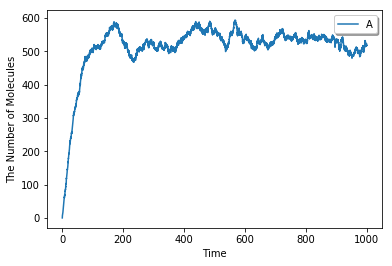

In [12]:
print('rm',rm)
print(dt,'s')
print(dt/60,'min')
viz.plot_number_observer(obs)

In [13]:
V=spatiocyte.SpatiocyteWorld.calculate_volume(Real3(L,L,L),rm*1.0208582) 
np.array(obs.data()).T[1]/V

array([0.        , 0.00922655, 0.01845309, ..., 4.79780388, 4.80703043,
       4.80703043])